<a href="https://colab.research.google.com/github/NattachaiJairak/Midterm/blob/main/class4_engine_python_vs_numba_print.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generate a DataFrame with 1,000,000 rows and 10 columns
data = np.random.randint(1, 11, size=(1000000, 10))

# Create a DataFrame
df = pd.DataFrame(data, columns=[f'col_{i}' for i in range(1, 11)])

# Apply square root to each cell using the default Python engine
df = df.apply(np.sqrt)

# Display the DataFrame
df

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10
0,2.645751,2.000000,2.828427,2.236068,2.645751,3.162278,1.732051,2.645751,2.828427,2.236068
1,2.000000,2.828427,2.828427,1.732051,2.449490,2.236068,1.414214,2.828427,2.449490,1.414214
2,2.236068,1.000000,3.162278,2.449490,3.000000,1.000000,3.162278,1.732051,2.645751,2.000000
3,3.000000,1.732051,2.236068,1.732051,2.645751,2.236068,3.000000,2.645751,1.414214,2.000000
4,3.000000,1.414214,3.162278,3.000000,3.162278,2.236068,1.414214,2.000000,2.645751,2.828427
...,...,...,...,...,...,...,...,...,...,...
999995,2.236068,3.162278,1.414214,2.000000,2.645751,1.414214,2.236068,1.414214,1.732051,2.449490
999996,3.162278,3.162278,1.000000,2.645751,2.645751,1.000000,2.000000,2.449490,2.645751,1.414214
999997,1.414214,3.000000,2.236068,3.000000,3.000000,3.162278,3.000000,1.732051,1.414214,2.645751
999998,1.000000,1.732051,3.162278,2.236068,2.828427,1.732051,2.645751,2.645751,1.000000,2.645751


In [ ]:
%%timeit

import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generate a DataFrame with 1,000,000 rows and 10 columns
data = np.random.randint(1, 11, size=(1000000, 10))

# Create a DataFrame
df = pd.DataFrame(data, columns=[f'col_{i}' for i in range(1, 11)])

# Apply square root to each cell using the default Python engine
df = df.apply(np.sqrt)

# Display the DataFrame
df

161 ms ± 1.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Numba

In [ ]:
pip install numba

In [ ]:
import pandas as pd
import numpy as np
from numba import njit

# Set seed for reproducibility
np.random.seed(42)

# Generate a DataFrame with 1,000,000 rows and 10 columns
data = np.random.randint(1, 11, size=(1000000, 10))

# Create a DataFrame
df = pd.DataFrame(data, columns=[f'col_{i}' for i in range(1, 11)])

# Numba JIT decorator for the square root function
@njit
def sqrt_numba(x):
    return np.sqrt(x)

# Apply square root to each cell using the Numba engine
df = df.apply(np.vectorize(sqrt_numba))

# Display the DataFrame
df

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10
0,2.645751,2.000000,2.828427,2.236068,2.645751,3.162278,1.732051,2.645751,2.828427,2.236068
1,2.000000,2.828427,2.828427,1.732051,2.449490,2.236068,1.414214,2.828427,2.449490,1.414214
2,2.236068,1.000000,3.162278,2.449490,3.000000,1.000000,3.162278,1.732051,2.645751,2.000000
3,3.000000,1.732051,2.236068,1.732051,2.645751,2.236068,3.000000,2.645751,1.414214,2.000000
4,3.000000,1.414214,3.162278,3.000000,3.162278,2.236068,1.414214,2.000000,2.645751,2.828427
...,...,...,...,...,...,...,...,...,...,...
999995,2.236068,3.162278,1.414214,2.000000,2.645751,1.414214,2.236068,1.414214,1.732051,2.449490
999996,3.162278,3.162278,1.000000,2.645751,2.645751,1.000000,2.000000,2.449490,2.645751,1.414214
999997,1.414214,3.000000,2.236068,3.000000,3.000000,3.162278,3.000000,1.732051,1.414214,2.645751
999998,1.000000,1.732051,3.162278,2.236068,2.828427,1.732051,2.645751,2.645751,1.000000,2.645751


In [ ]:
%%timeit

import pandas as pd
import numpy as np
from numba import njit

# Set seed for reproducibility
np.random.seed(42)

# Generate a DataFrame with 1,000,000 rows and 10 columns
data = np.random.randint(1, 11, size=(1000000, 10))

# Create a DataFrame
df = pd.DataFrame(data, columns=[f'col_{i}' for i in range(1, 11)])

# Numba JIT decorator for the square root function
@njit
def sqrt_numba(x):
    return np.sqrt(x)

# Apply square root to each cell using the Numba engine
df = df.apply(np.vectorize(sqrt_numba))

# Display the DataFrame
df

1.99 s ± 36.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
pip install matplotlib

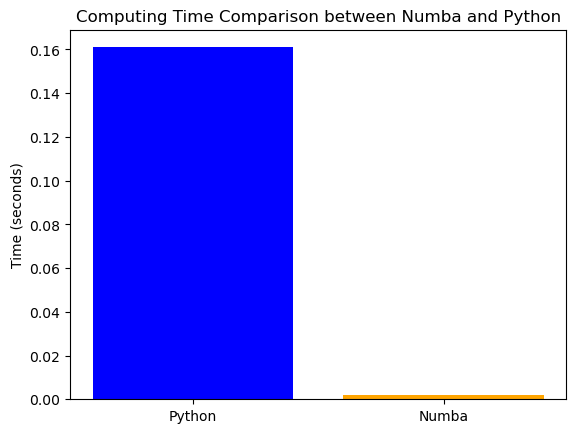

In [ ]:
import matplotlib.pyplot as plt

# Time results in seconds
python_time = 161 / 1000  # Convert milliseconds to seconds
numba_time = 1.99 / 1000  # Convert milliseconds to seconds

# Data for the bar chart
labels = ['Python', 'Numba']
times = [python_time, numba_time]

# Plotting the bar chart
plt.bar(labels, times, color=['blue', 'orange'])
plt.ylabel('Time (seconds)')
plt.title('Computing Time Comparison between Numba and Python')
plt.show()